# Trabajo Practico - Desarrollo de software para el cálculo de parámetros acústicos ISO 3382 (2da entrega)

## Fecha de entrega

*Ingresar fecha*

## Integrantes

* <Marcos, García Giorgi>
* <Joaquin, Duhalde>


## Aspectos generales del notebook

* Todas las funciones deben contar con su [docstring](https://realpython.com/documenting-python-code/#docstring-types), como figura en la función de ejemplo (`ruidoRosa_voss`)(1er entrega).
* Todos los gráficos deben tener correctamente etiquetados los ejes.
* Enviar el notebook (.ipynb) (con las celdas ejecutas) y todos los archivos para reproducir los resultados por Slack.
* Todas las señales de audio deben ser grabadas en formato .wav en la misma función que las genera.

## Librerias utilizadas
Agregar todas las librerias utilizadas, algunas a modo de ejemplo:

In [8]:
import os
import numpy as np
import wave
from pydub import AudioSegment
from scipy.signal import find_peaks
from pydub.playback import play
import soundfile as sf
import scipy.io.wavfile as wav
from scipy.io import wavfile
from IPython.display import Audio
from scipy.fft import fft, ifft
from pre_procesamiento import plot_dominio_temporal
#Constantes
fs = 44100

## Descargar dataset
El objetivo es tener archivos para validar el software creado , para lo cual es necesario contar con la información y los datos de la medición.

### 1. Respuestas al impulso: 
**Consigna:** Descargar **al menos dos** respuestas al impulso (RI o en ingles IR, Impulse Responses) de dos recintos distintos del siguiente [link](https://www.openair.hosted.york.ac.uk/?page_id=36) y toda la información relevante de la medición, ademas de los resultados de los parametros acústicos calculados (para luego comparar). También se pueden usar los archivos dispuestos en el Drive de la asignatura. 

### 2. Sine sweep logarítmico + filtro inverso: 
**Consigna:** Descargar **al menos un** sine sweep con su respectivo filtro inverso. Una posibildiad es usar los archivos dispuestos en el GDrive de la asignatura. Para generar el filtro inverso usar la info brindada por el informe técnico en la misma carpeta de los archivos. 

## Función de carga de archivos de audio

**Consigna:** realizar una función que permita cargar archivos de audio, en lo posible \*.wav, por ejemplo los archivos anteriormente descargados. Contemplar el ingreso de más de un archivo de audio, por tipo.

In [9]:
def cargar_archivos_de_audio(directorio):
    archivos_de_audio = []

    # Verifica si el directorio existe
    if not os.path.exists(directorio):
        print(f"El directorio '{directorio}' no existe.")
        return archivos_de_audio

    # Itera sobre los archivos en el directorio
    for archivo in os.listdir(directorio):
        if archivo.endswith(".wav"):
            archivos_de_audio.append(os.path.join(directorio, archivo))        

    return archivos_de_audio

# Directorio que contiene los archivos de audio .wav
# Utiliza una ruta relativa desde el directorio donde se encuentra este script
directorio_audio = "carpeta_de_audios"

# Carga los archivos de audio
archivos_audio = cargar_archivos_de_audio(directorio_audio)

# Imprime la lista de archivos
for i, archivo in enumerate(archivos_audio):
    print(f"{i}: {archivo}")

# Elije el índice del archivo que deseas cargar
indice_archivo = 0  # Cambia este valor al índice del archivo que deseas cargar

if 0 <= indice_archivo < len(archivos_audio):
    archivo_seleccionado = archivos_audio[indice_archivo]
    print(f"Cargando archivo: {archivo_seleccionado}")

    # Llama a la función con el archivo seleccionado
    # Luego puedes realizar operaciones con el archivo, por ejemplo, cargarlo y procesarlo
    # Cargar el archivo, procesarlo, etc.
else:
    print("El índice seleccionado está fuera de rango. Debe estar en el rango [0, {}].".format(len(archivos_audio) - 1))


0: carpeta_de_audios\1st_baptist_nashville_balcony.wav
1: carpeta_de_audios\1st_baptist_nashville_far_close.wav
2: carpeta_de_audios\1st_baptist_nashville_far_wide.wav
3: carpeta_de_audios\alcuin_s1r1front_bformat.wav
4: carpeta_de_audios\alcuin_s1r1_bformat.wav
5: carpeta_de_audios\alcuin_s1r2_bformat.wav
Cargando archivo: carpeta_de_audios\1st_baptist_nashville_balcony.wav


Llamar a la función con uno de los ejemplos anteriormente descargados y usar la función de visualización de la 1er entrega.

0: carpeta_de_audios\1st_baptist_nashville_balcony.wav
1: carpeta_de_audios\1st_baptist_nashville_far_close.wav
2: carpeta_de_audios\1st_baptist_nashville_far_wide.wav
3: carpeta_de_audios\alcuin_s1r1front_bformat.wav
4: carpeta_de_audios\alcuin_s1r1_bformat.wav
5: carpeta_de_audios\alcuin_s1r2_bformat.wav
Cargando archivo: carpeta_de_audios\1st_baptist_nashville_balcony.wav


C:\Users\Hugo\AppData\Local\Temp\ipykernel_984\1645292567.py:17: WavFileWarning: Chunk (non-data) not understood, skipping it.
  tasa_muestreo, audio_data = wavfile.read(archivo_seleccionado)


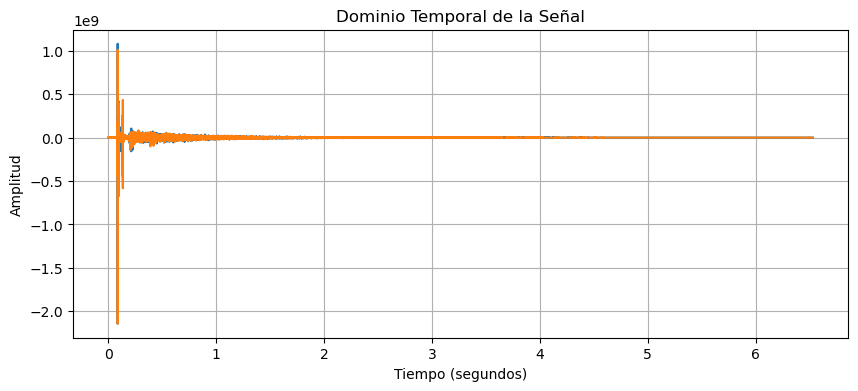

In [37]:
directorio_audio = "carpeta_de_audios"
archivos_audio = cargar_archivos_de_audio(directorio_audio)
for i, archivo in enumerate(archivos_audio):
    print(f"{i}: {archivo}")
# Cambia este valor al índice del archivo que deseas cargar
indice_archivo = 0
if 0 <= indice_archivo < len(archivos_audio):
    archivo_seleccionado = archivos_audio[indice_archivo]
    print(f"Cargando archivo: {archivo_seleccionado}")

    # Aquí puedes realizar operaciones con el archivo seleccionado, como cargarlo y procesarlo.
else:
    print("El índice seleccionado está fuera de rango. Debe estar en el rango [0, {}].".format(len(archivos_audio) - 1))
# Ruta al archivo WAV que deseas leer

# Utiliza la función wavfile.read() para cargar el archivo WAV
tasa_muestreo, audio_data = wavfile.read(archivo_seleccionado)
plot_dominio_temporal(audio_data,fs= 44100)


> **Opcional**: el código de la siguiente celda genera un botón de selección (ver los pasos de instalación [aqui](https://ipywidgets.readthedocs.io/en/latest/user_install.html)), y guarda las rutas a los archivos seleccionados en la variable files. La función desarrollada debería tomar las rutas y leer el contenido de los archivos, utilizando alguna de las librerías vistas en clase.

In [84]:
from ipywidgets import Button
from tkinter import Tk, filedialog
from IPython.display import clear_output, display
files = []
def select_files(b,files=files):
    clear_output()
    root = Tk()
    root.withdraw() # Hide the main window.
    root.call('wm', 'attributes', '.', '-topmost', True) # Raise the root to the top of all windows.
    files.append(filedialog.askopenfilename()) # List of selected files will be set button's file attribute.
    print(files) # Print the list of files selected.

fileselect = Button(description="Seleccione el archivo")
fileselect.on_click(select_files)

display(fileselect)
files

Button(description='Seleccione el archivo', style=ButtonStyle())

[]

## Función de sintetización de respuesta al impulso

**Consigna:** realizar una función para sintetizar una respuesta al impulso. La misma recibira como parametro el $T60$ que se desea obtener, y deberá sintetizar una respuesta al impulso considerando las frecuencias centrales de banda de octava y tercio de octava como establece la norma IEC61260 (IEC61260,1995). La siguiente ecuación define una RI, para una frecuencia central $f_{i}$:

\begin{equation}
y_{i}=A_{i}e^{-\tau_it}\cos(2πf_{i}t)
\tag{6}
\end{equation}

donde $A_{i}$ es el coeficiente de amplitud para esa $f_{i}$(puede ser 1), y  $π_{i}$ define el decaimiento exponencial en función de $T_{60_i}$ (tiempo de reverberación) para una frecuencia $f_{i}$.

\begin{equation}
\tau_i=-\frac{ln(10^{-3})}{T_{60_i}}
\tag{7}
\end{equation}

La suma de varias frecuencias centrales $f_{i}$ se define como:
\begin{equation}
  y=\sum_{y=1}^{n}y_{i}
\tag{8}
\end{equation}

Con $n$ la cantidad de frecuencias centrales $f_{i}$ del filtro. La funcion debe recibir el tiempo de reverberacion para cada frecuencia, y devolver la respuesta al impulso correspondiente como un archivo de audio .wav. Al momento de definir la función, buscar la forma de que la misma permita varios $T60_i$ para cada frecuencia. 

> Con esta funcion se busca obtener un archivo de audio de valores de $T60_i$ conocidos que permita probar el software.

Llamar a la función con un vector que contega varios $T60$ para las cada frecuencias centrales $f_{i}$.

In [38]:
def generar_respuesta_al_impulso(T60_lista, frecuencias_lista, duracion, archivo_salida):
    # Número de muestras
    fs = 44100  # Frecuencia de muestreo (puedes ajustarla)
    n_muestras = int(fs * duracion)

    # Crear el arreglo de tiempo
    t = np.arange(0, n_muestras) / fs

    # Inicializar la respuesta al impulso
    respuesta_impulso = np.zeros(n_muestras)

    # Generar la respuesta al impulso para cada frecuencia y T60 y sumarlas
    for T60, frecuencia in zip(T60_lista, frecuencias_lista):
        # Cálculo de τ
        tau = -np.log(10**(-3)) / (T60)

        # Generar la respuesta al impulso para la frecuencia actual
        respuesta_frecuencia = np.exp(-tau * t) * np.cos(2 * np.pi * frecuencia * t)

        # Sumar la respuesta de esta frecuencia a la respuesta global
        respuesta_impulso += respuesta_frecuencia

    # Normalizar la respuesta al impulso
    respuesta_impulso /= np.max(np.abs(respuesta_impulso))

    # Guardar la respuesta al impulso como archivo de audio .wav
    wav.write(archivo_salida, fs, respuesta_impulso.astype(np.float32))

# Ejemplo de uso de la función
T60_lista = [2.59, 2.61, 2.47]  # Lista de T60 para cada frecuencia
frecuencias_lista = [500, 1000, 2000]  # Lista de frecuencias centrales
duracion = max(T60_lista) + 2  # Duración en segundos
nombre_archivo = 'respuesta_al_impulso.wav'  # Nombre del archivo de salida

generar_respuesta_al_impulso(T60_lista, frecuencias_lista, duracion, nombre_archivo)    


Llamar la función de visualizar el dominio temporal, de la entrega anterior.

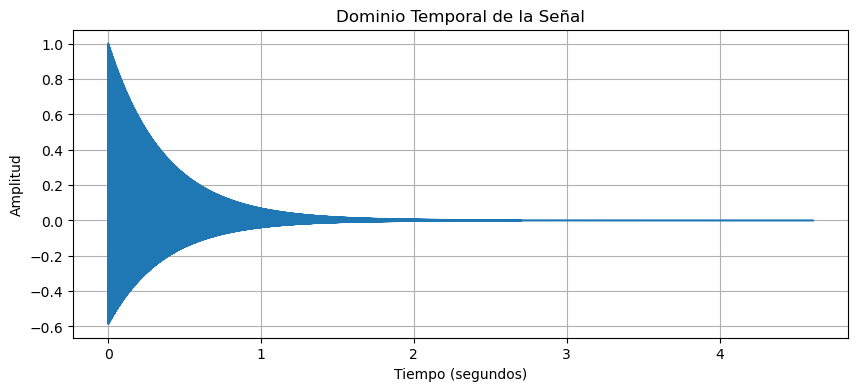

In [39]:

# Llama a la función
respuesta_al_impulso, fs = sf.read("respuesta_al_impulso.wav")
plot_dominio_temporal(respuesta_al_impulso,fs= 44100)


Graficar el dominio espectral del resultado utilizando el [software Audacity](https://www.audacityteam.org/) (Ayuda: [Plot Spectrum Audacity](https://manual.audacityteam.org/man/plot_spectrum.html))

In [87]:
# completar

Reproducir señal resultante.

In [40]:
# Reproducir la señal de audio
Audio(respuesta_al_impulso, rate=fs)

Comentar sobre el resultado obtenido, ¿Es una buena aproximación? ¿Qué aspectos estamos dejando de lado en esta sintetización, que en un caso real estan presentes?.

*completar*

## Función obtener respuesta al impulso

**Consigna:** realizar una función que permita obtener la respuesta al impulso en formato de señal de audio .wav, a partir del sinesweep logarítmico grabado y el filtro inverso generado utilizando el siguiente método: 

Supongamos que un recinto es excitado por una señal sinesweep logarítmica $x(t)$ y captada por un micrófono $y(t)$ y buscamos la RI del recinto $h(t)$, lo anterior se expresa de la siguiente manera:

\begin{equation}
y(t)=x(t)*h(t)
\tag{9}
\end{equation}

Para un sine sweep lineal (que no es nuestro caso) el problema es sencillo, pero en nuestro caso (sine sweep logarítmico) requiere trabajar un poco respecto $x(t)$ para obtener la siguiente expresión:

\begin{equation}
h(t) = F^{-1}[H(jw)]=F^{-1}[Y(jw)K(jw)]
\tag{10}
\end{equation}

Recordar que $k(t)$ es el filtro inverso (ecu.5) y $K(jw)$ su respectiva transformada de fourier. De esta manera se obtiene la respuesta al impulso buscada.

> El desarrollo matemático de la anterior expresión se encuentra en el [Anexo I - Obtener la respuesta al impulso a partir de un sine sweep](../consigna_TP_matlab.pdf) (p.14) del instructivo para Matlab del TP.

In [41]:
def respuesta_al_impulso(sine_sweep_wav, filtro_inverso_wav, salida_wav):
    # Cargar los archivos .wav
    sine_sweep, fs_sine_sweep = sf.read(sine_sweep_wav)
    filtro_inverso, fs_filtro_inverso = sf.read(filtro_inverso_wav)

    # Asegurarse de que tengan la misma frecuencia de muestreo
    if fs_sine_sweep != fs_filtro_inverso:
        raise ValueError("Las señales deben tener la misma frecuencia de muestreo.")

    # Calcular la transformada de Fourier de ambas señales
    fft_sine_sweep = fft(sine_sweep)
    fft_filtro_inverso = fft(filtro_inverso)

    # Multiplicar las transformadas en el dominio de la frecuencia
    respuesta_frecuencial = fft_sine_sweep * fft_filtro_inverso

    # Aplicar la antitransformada para obtener la respuesta al impulso en el dominio del tiempo
    respuesta_impulso = ifft(respuesta_frecuencial).real

    # Normalizar la respuesta al impulso
    respuesta_impulso /= np.max(np.abs(respuesta_impulso))

    # Guardar la respuesta al impulso como archivo de audio .wav
    sf.write(salida_wav, respuesta_impulso, fs_sine_sweep)

Llamar a la función con un sine sweep y su respectivo filtro inverso creados con la función de la primer entrega (**no** los descargados).

In [42]:
sine_sweep = "signal_recording.wav"
filtro_inv = "filtro_inverso.wav"
salida_wav = 'respuesta_al_impulsoObtenida.wav'
# Llamar a la función
respuesta_al_impulso(sine_sweep, filtro_inv,salida_wav)

Visualizar la señal con la función creada en la primer entrega.

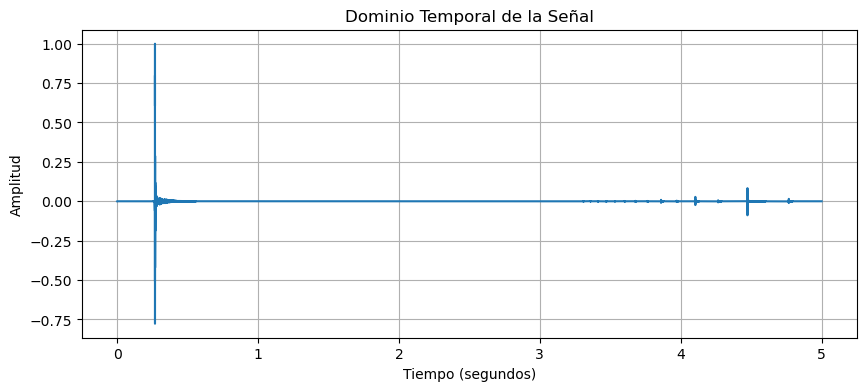

In [43]:
# Llama a la función
obtencion_respuesta_al_impulso, fs = sf.read("respuesta_al_impulsoObtenida.wav")
plot_dominio_temporal(obtencion_respuesta_al_impulso,fs= 44100)

Reproducir señal resultante.

In [44]:
# Reproducir la señal de audio
Audio(obtencion_respuesta_al_impulso, rate=fs)

Comentar sobre el resultado obtenido. ¿Qué es lo que se esta escuchando? Realizar el mismo procedimiento con la señal descargada y el filtro inverso generado (para dicho sine sweep)

En el resultado se escucha una respuesta al impulso, muy rapida que decae muy velozmente, tambien se puede apreciar ruido y pequeñas subidas de amplitud en frecuencias altas, apreciables tambien en el grafico de la respuesta, esto puede deberse a imperfecciones en el sine sweep grabado con respecto al filtro inverso con el cual se concoluciona. Este sine sweep fue grabado utilizando intrumental casero, como microfronos de la computadora y parlantes de mala calidad, lo que puede generar ruido en la respuesta final.

In [45]:
sine_sweep = "Toma_n1_a-03.wav"
filtro_inv = "filtro_inversoDR.wav"
salida_wav = 'respuesta_al_impulsoDESCARGADOS.wav'
# Llamar a la función
respuesta_al_impulso(sine_sweep, filtro_inv,salida_wav)

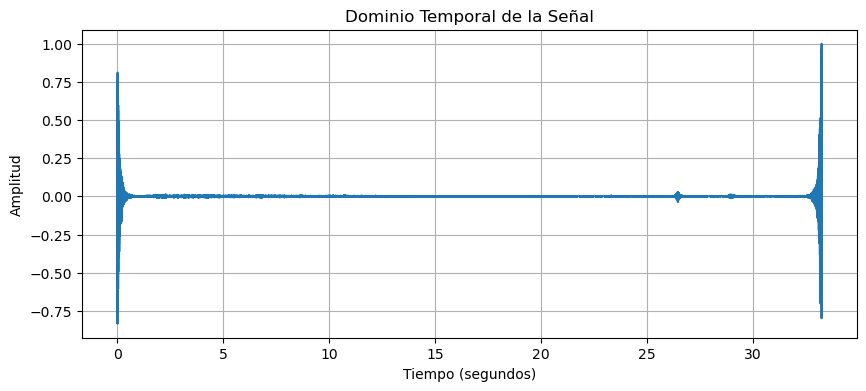

In [46]:
# Llama a la función
obtencion_respuesta_al_impulso, fs = sf.read("respuesta_al_impulsoDESCARGADOS.wav")
plot_dominio_temporal(obtencion_respuesta_al_impulso,fs= 44100)

In [47]:
# Reproducir la señal de audio
Audio(obtencion_respuesta_al_impulso, rate=fs)

Mencionar aspectos que diferencian los impulso generados en esta función, con los sintetizados.

Las diferencias principales que se puede notar es la ausencia de ruido en el caso de las respuestas sinteteizadas, pero ademas de esto notamos un decaimiento mas gradual en la repsuesat sintetizada, aunque esto es afectado por los valores de T60 que nosotros propocionamos a la funcion, si estos cambian la caida tambien cambia.

## Función filtros norma IEC61260

**Consigna**: Realizar una función que filtre todas las señales en octavas y tercio de octava según la norma IEC61260, con el objetivo de calcular los parámetros acústicos discriminando las frecuencias. 

Para lo cual utilizar las funciones del modulo [signals de scipy](https://docs.scipy.org/doc/scipy/reference/signal.html). Se adjunta el código capaz de calcular los coeficientes del filtro y aplicarlos a una señal. La función debe completarse con el código necesario para que este proceso se repita para cada una de las frecuencias centrales determinadas en la norma. Así mismo, el primer argumento de la función [iirfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.iirfilter.html) determina el grado del filtro. Evaluar el valor del mismo para que la frecuencia central de la banda coincida con las especificadas en la norma.

> Para ver una introducción breve a la implementación de filtros, usar el siguiente [documento](https://github.com/maxiyommi/signal-systems/blob/master/material_extra/Filtros/intro_filtros.ipynb).

In [31]:
def iec61260_filtros(audio_signal, sample_rate=44100):
    # Lista de frecuencias centrales según la norma IEC61260 para octavas y tercios de octava
    center_frequencies = [31.5, 63, 125, 250, 500, 1000, 2000, 4000, 8000]

    filtered_signals = []

    for center_frequency in center_frequencies:
        G = 1.0 / 2.0  # Octava - G = 1.0/2.0 / 1/3 de Octava - G=1.0/6.0
        factor = np.power(2, G)
        center_frequency_hz = center_frequency

        lower_cutoff_frequency_hz = center_frequency_hz / factor
        upper_cutoff_frequency_hz = center_frequency_hz * factor

        # Extraer coeficientes del filtro
        b, a = audio_signal.iirfilter(4, [2 * np.pi * lower_cutoff_frequency_hz, 2 * np.pi * upper_cutoff_frequency_hz],
                                rs=60, btype='band', analog=True,
                                ftype='butter')

        # Para aplicar el filtro de manera más óptima
        sos = audio_signal.iirfilter(4, [lower_cutoff_frequency_hz, upper_cutoff_frequency_hz],
                               rs=60, btype='band', analog=False,
                               ftype='butter', fs=sample_rate, output='sos')
        filtered_signal = audio_signal.sosfilt(sos, audio_signal)

        filtered_signals.append(filtered_signal)

    return filtered_signals

Llamar a la función con alguna RI generada anteriormente.

Graficar el dominio espectral del resultado en una banda, utilizando el [software Audacity](https://www.audacityteam.org/) (Ayuda: [Plot Spectrum Audacity](https://manual.audacityteam.org/man/plot_spectrum.html))

In [ ]:
# completar

¿El resultado es el esperado? ¿Cumple con los requerimientos de la normativa?

*completar*

## Función conversión a escala logarítmica normalizada
Para visualizar correctamente la señal es necesario realizar una función que convierta la respuesta al impulso en escala logarítmica, utilizando la siguiente expresión:

\begin{equation}
    R(t) = 20\log_{10}\frac{A(t)}{A(t)_{max}}
\tag{11}
\end{equation}

Donde $A(t)$ es la señal que deseamos transformar de escala. **Consigna:** crear una función que convierta a escala logarítmica la RI que ingresa y devuelva un array con la señal resultante.

In [48]:

def convertir_audio_a_escala_logaritmica(señal_audio):
    """
    Convierte un archivo de audio en escala logarítmica y devuelve el resultado como un array.

    Parámetros:
    señal_audio (str): Ruta al archivo de audio de entrada (formato .wav).

    Retorna:
    numpy.ndarray: El array de la señal en escala logarítmica.
    """
    # Cargar el archivo de audio .wav
    tasa_muestreo, audio_data = wavfile.read(señal_audio)

    # Normalizar los valores de audio entre -1 y 1
    audio_data = audio_data.astype(np.float32) / np.max(np.abs(audio_data))
    epsilon = 1e-10
    audio_log = 20 * np.log10(np.abs(audio_data) + epsilon)

    return audio_log



Llamar a la función con alguna de las señales generadas anteriormente.

In [50]:
señal_audio = "respuesta_al_impulsoObtenida.wav"
audio_log = convertir_audio_a_escala_logaritmica(señal_audio)

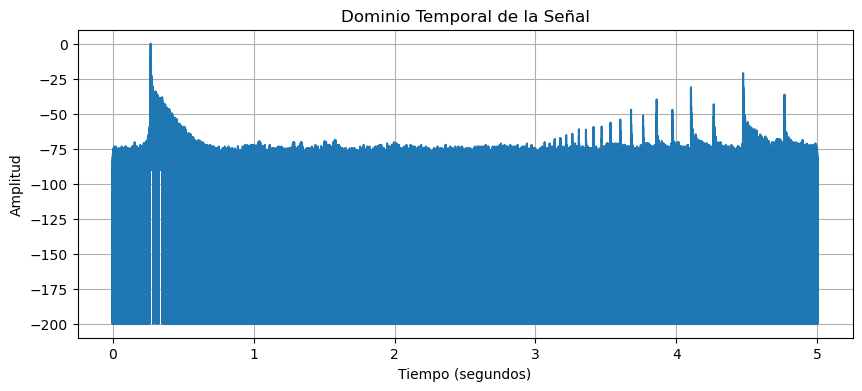

In [51]:
plot_dominio_temporal(audio_log,fs= 44100)

### Informe preliminar (opcional)
Realizar un informe preliminar en formato UNTREF para memorias cuatrimestrales (disponible en el Drive de la asignatura), utilizando la plataforma de dición de documentos [LaTeX](https://es.wikipedia.org/wiki/LaTeX). Respetar las siguientes consignas:
1. Mencionar los detalles en el diseño de los scripts(con ayuda de diagramas de flujo o pseudocódigo) sin agregar código propiamente dicho.
2. Describir el dataset seleccionado para probar el software.
3. El informe debe reflejar la arquitectura del software desarrollado y los avances en la producción del mismo. Los datos que se informan tienen que ser relevantes y garantizar la reproducibilidad de los mismos. No ahondar en muchos detalles teóricos y definiciones(hacer uso de referencias),hacer más bien foco en la producción del software, su evaluación y su validación.
4. El informe preliminar no debe exceder las 3 páginas. Respetar fecha de entrega.
5. Respetar los siguientes porcentajes de contenido por sección(también determinan los grados de importancia)

A modo ilustrastivo se muestra los porcentajes del contenido en los informes:

| Resumen | Introducción | Marco teórico | Desarrollo experimental | Resultados | Conclusiones |
| -- | -- | -- | -- | -- | --  |
| 5% | 10% | 10% | 25% | 30% | 20% |

> Más información en el siguiente [link](https://github.com/maxiyommi/signal-systems/tree/master/trabajo_practico#informe-t%C3%A9cnico).